In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

with open('output.txt', 'r') as file:
    txt_data = file.readlines()

csv_data = [line.replace(',', ',') for line in txt_data]
with open('output.csv', 'w') as file:
    file.writelines(csv_data)

df = pd.read_csv('output.csv')

df = df.rename(columns={'Unnamed: 0': 'X'})
colnames = df.columns

df = df.drop(['Unnamed: 0.1', 'X'], axis=1)

Y = df.Y.values
df = df.drop(['Y'], axis=1)
X = df.to_numpy()
colnames = df.columns

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y.reshape(-1, 1))[:, 0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))

lasso = Lasso(alpha=0.05)
lasso.fit(X_scaled, Y_imputed)

ranks = {}
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

r = {}
for name in colnames:
    if name in ranks["Lasso"]:
        r[name] = round(ranks["Lasso"][name], 2)
    else:
        r[name] = 0

ranks["Mean"] = r
methods = ["Lasso", "Mean"]

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method].get(name, 0) for method in methods]))))

meanplot = pd.DataFrame(list(r.items()), columns=['Feature', 'Mean Ranking'])
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

top_20_features = meanplot.head(20).rename(columns={'Mean Ranking': 'Score'})


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [8010]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
SNAP47	0.0	0.0
SNAP91	0.0	0.0
SNAPC1	0.0	0.0
SNAPC2	0.0	0.0
SNAPC3	0.0	0.0
SNAPC4	0.0	0.0
SNAPC5	0.0	0.0
SNAPIN	0.0	0.0
SNAR-A1	0.0	0.0
SNAR-A10	0.0	0.0
SNAR-A11	0.0	0.0
SNAR-A12	0.0	0.0
SNAR-A13	0.0	0.0
SNAR-A14	0.0	0.0
SNAR-A2	0.0	0.0
SNAR-A3	0.0	0.0
SNAR-A4	0.0	0.0
SNAR-A5	0.0	0.0
SNAR-A6	0.0	0.0
SNAR-A7	0.0	0.0
SNAR-A8	0.0	0.0
SNAR-A9	0.0	0.0
SNAR-B1	0.0	0.0
SNAR-B2	0.0	0.0
SNAR-C1	0.0	0.0
SNAR-C2	0.0	0.0
SNAR-C3	0.0	0.0
SNAR-C4	0.0	0.0
SNAR-C5	0.0	0.0
SNAR-D	0.0	0.0
SNAR-E	0.0	0.0
SNAR-F	0.0	0.0
SNAR-G1	0.0	0.0
SNAR-G2	0.0	0.0
SNAR-H	0.0	0.0
SNAR-I	0.0	0.0
SNCA	0.0	0.0
SNCA-AS1	0.0	0.0
SNCAIP	0.0	0.0
SNCB	0.0	0.0
SNCG	0.0	0.0
SND1	0.0	0.0
SND1-IT1	0.0	0.0
SNED1	0.0	0.0
SNF8	0.0	0.0
SNHG1	0.0	0.0
SNHG10	0.0	0.0
SNHG11	0.0	0.0
SNHG12	0.0	0.0
SNHG14	0.0	0.0
SNHG15	0.0	0.0
SNHG16	0.0	0.0
SNHG17	0.0	0.0
SNHG18	0.0	0.0
SNHG19	0.0	0.0
SNHG20	0.0	0.0
SNHG21	0.0	0.0
SNHG22	0.0	0.0
SNHG25	0.0	0.0
SNHG26	0.0	0.0
SNHG27	0.0	0.0
SNHG28	0.0	0.0

<ipython-input-2-682f5172e4a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=top_20_features, palette='viridis')


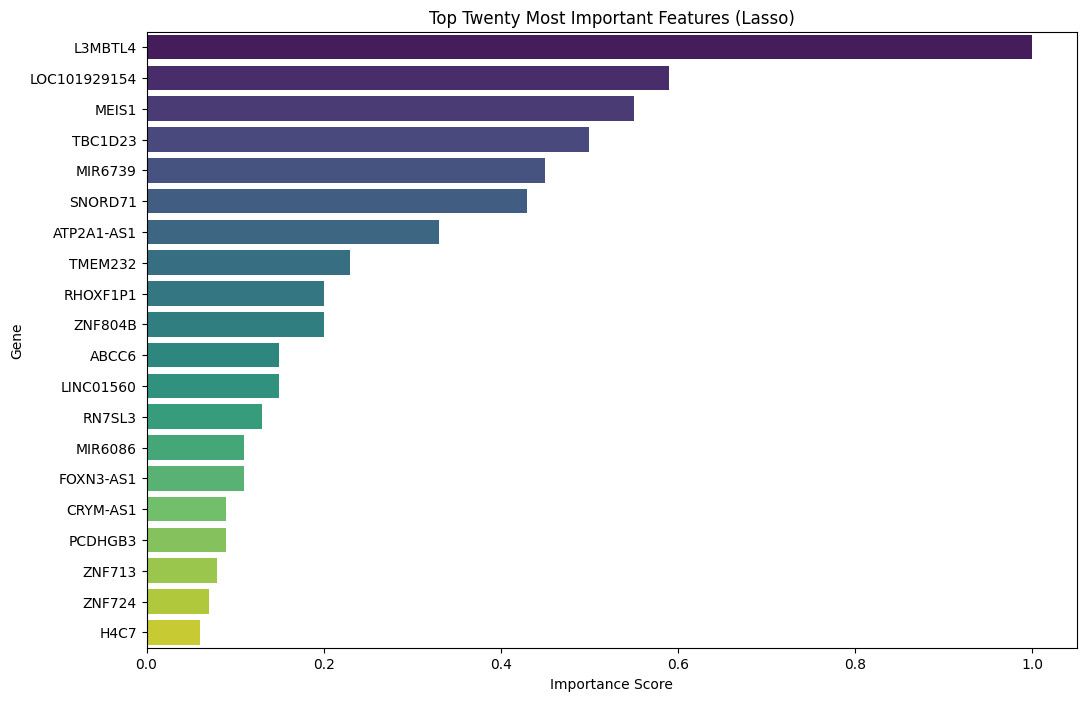

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=top_20_features, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Gene')
plt.title('Top Twenty Most Important Features (Lasso)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y_imputed, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.05, random_state=42)
lasso.fit(X_train, y_train)

y_pred_continuous = lasso.predict(X_test)
y_pred = Binarizer(threshold=0.5).fit_transform(y_pred_continuous.reshape(-1, 1)).ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(" Classification Metrics:")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall       : {recall:.3f}")
print(f"F1 Score     : {f1:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")

#

 Classification Metrics:
Accuracy     : 0.750
Precision    : 1.000
Recall       : 0.600
F1 Score     : 0.750
ROC AUC Score: 1.000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.811e-03, tolerance: 6.964e-04
  model = cd_fast.enet_coordinate_descent(



🏆 Top 10 Important Genes:
 Rank       Gene  Coefficient
    1   Gene_168     0.000242
    2 Gene_21377     0.000226
    3 Gene_14418     0.000141
    4  Gene_1640    -0.000132
    5   Gene_735     0.000108
    6  Gene_3912     0.000084
    7     Gene_3    -0.000082
    8 Gene_10560    -0.000067
    9   Gene_304    -0.000054
   10  Gene_5397     0.000052


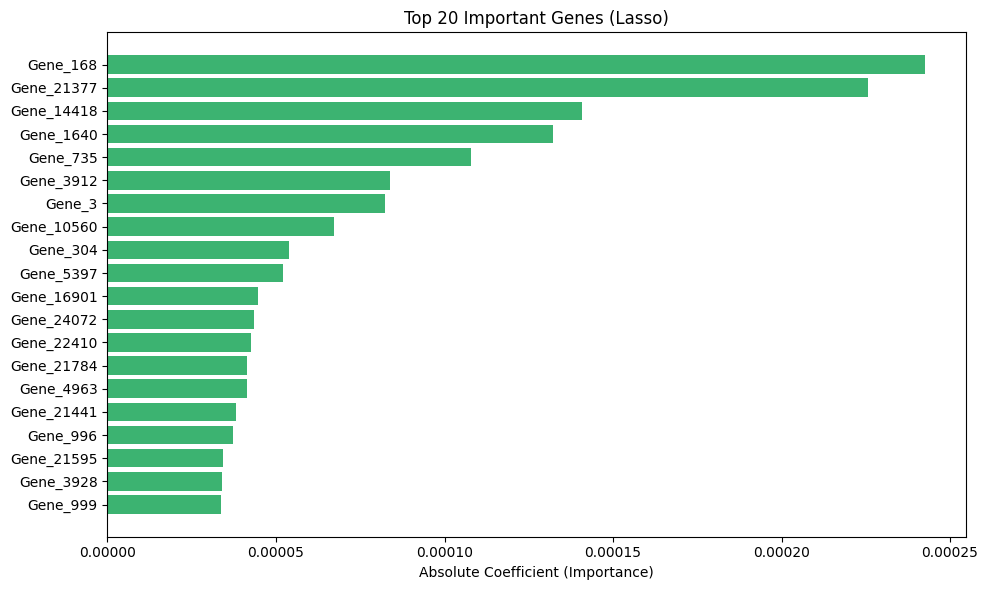

In [ ]:
gene_names = [f"Gene_{i}" for i in range(X_imputed.shape[1])]
X_df = pd.DataFrame(X_imputed, columns=gene_names)
colnames = X_df.columns

coefs = lasso.coef_
abs_coefs = np.abs(coefs)

gene_rankings = pd.DataFrame({
    'Gene': colnames,
    'Coefficient': coefs,
    'Importance': abs_coefs
})

gene_rankings = gene_rankings.sort_values(by='Importance', ascending=False).reset_index(drop=True)
gene_rankings['Rank'] = gene_rankings.index + 1

print("\n🏆 Top 10 Important Genes:")
print(gene_rankings[['Rank', 'Gene', 'Coefficient']].head(10).to_string(index=False))

top_n = 20
top_genes = gene_rankings.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importance'], color='mediumseagreen')
plt.xlabel("Absolute Coefficient (Importance)")
plt.title(f"Top {top_n} Important Genes (Lasso)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
df_raw = pd.read_csv('output.csv')
print(df_raw.columns.tolist())
print(df_raw.head(3))


['Unnamed: 0.1', 'Unnamed: 0', 'Y', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AA06', 'AAAS', 'AACS', 'AACSP1', 'AADAC', 'AADACL2', 'AADACL2-AS1', 'AADACL3', 'AADACL4', 'AADACP1', 'AADAT', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AANAT', 'AAR2', 'AARD', 'AARS1', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATBC', 'AATF', 'AATK', 'ABALON', 'ABAT', 'ABCA1', 'ABCA10', 'ABCA11P', 'ABCA12', 'ABCA13', 'ABCA17P', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCA9-AS1', 'ABCB1', 'ABCB10', 'ABCB11', 'ABCB4', 'ABCB5', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC13', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC5-AS1', 'ABCC6', 'ABCC6P1', 'ABCC6P2', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD11-AS1', 'ABHD12', 'ABHD12B', 'ABHD13', 'ABHD14A', 'ABHD14A-ACY1', 'ABHD1

In [ ]:
df_raw = df_raw.drop(columns=["Unnamed: 0", "Unnamed: 0.1", 'Y'], errors="ignore")


In [ ]:
dff = df_raw.T


In [ ]:
dff

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
A1BG,13.0,18.0,9.0,13.0,14.0,6.0,4.0,6.0,3.0,3.0,...,8.0,3.0,12.0,5.0,16.0,15.0,7.0,5.0,4.0,3.0
A1BG-AS1,7.0,5.0,3.0,3.0,8.0,6.0,8.0,10.0,5.0,2.0,...,3.0,5.0,13.0,9.0,9.0,12.0,2.0,3.0,4.0,1.0
A1CF,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
A2M,6701.0,6744.0,3251.0,3359.0,2010.0,1926.0,1693.0,1745.0,1656.0,1606.0,...,1886.0,1876.0,2888.0,2876.0,3250.0,3259.0,1456.0,1416.0,2357.0,2357.0
A2M-AS1,26.0,29.0,41.0,31.0,19.0,18.0,16.0,14.0,5.0,5.0,...,8.0,12.0,26.0,18.0,24.0,18.0,6.0,9.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.0,2.0,1.0,1.0,4.0,4.0,1.0,0.0,8.0,14.0,...,17.0,26.0,1.0,5.0,2.0,0.0,0.0,0.0,2.0,2.0
ZYG11B,437.0,436.0,178.0,158.0,151.0,203.0,320.0,301.0,121.0,134.0,...,235.0,222.0,333.0,405.0,343.0,341.0,153.0,160.0,199.0,217.0
ZYX,1469.0,1382.0,350.0,302.0,343.0,367.0,661.0,629.0,169.0,201.0,...,324.0,330.0,732.0,782.0,1359.0,1393.0,501.0,489.0,512.0,499.0
ZZEF1,335.0,383.0,75.0,82.0,250.0,215.0,205.0,202.0,132.0,103.0,...,218.0,223.0,372.0,367.0,400.0,447.0,289.0,339.0,259.0,288.0


In [ ]:
real_gene_names = dff.index.tolist()


In [ ]:
real_gene_names

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS1',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC5-AS1',
 'ABCC6',
 'ABCC6P1',
 'ABCC6P2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD11-AS1',
 'ABH

In [ ]:
gene_map_df = pd.DataFrame({
    'Index': list(range(len(real_gene_names))),
    'Gene_Name': real_gene_names
})

print(gene_map_df.head())


   Index Gene_Name
0      0      A1BG
1      1  A1BG-AS1
2      2      A1CF
3      3       A2M
4      4   A2M-AS1


In [ ]:
X_temp_df = pd.DataFrame(X_imputed)

print("Index starts from:", X_temp_df.index[0])
print("Index ends at:", X_temp_df.index[-1])
print("Shape of X_imputed:", X_imputed.shape)


Index starts from: 0
Index ends at: 35
Shape of X_imputed: (36, 28278)


In [ ]:
X_imputed_T

array([[1.300e+01, 1.800e+01, 9.000e+00, ..., 5.000e+00, 4.000e+00,
        3.000e+00],
       [7.000e+00, 5.000e+00, 3.000e+00, ..., 3.000e+00, 4.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.469e+03, 1.382e+03, 3.500e+02, ..., 4.890e+02, 5.120e+02,
        4.990e+02],
       [3.350e+02, 3.830e+02, 7.500e+01, ..., 3.390e+02, 2.590e+02,
        2.880e+02],
       [3.820e+02, 4.250e+02, 1.450e+02, ..., 3.620e+02, 3.890e+02,
        4.010e+02]])

In [ ]:


print("Number of Lasso coefficients:", len(coefs))
print("Number of real gene names   :", len(real_gene_names))


Number of Lasso coefficients: 28278
Number of real gene names   : 28279


In [ ]:
real_gene_names = real_gene_names[:len(coefs)]


In [ ]:
gene_ranks = pd.DataFrame({
    'Gene': real_gene_names,
    'Coefficient': coefs,
    'Importance': np.abs(coefs)
})

top_genes = gene_ranks.sort_values(by='Importance', ascending=False).head(20)


<ipython-input-40-2fca65c9c68d>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_20_features['Feature'], fontweight='bold')


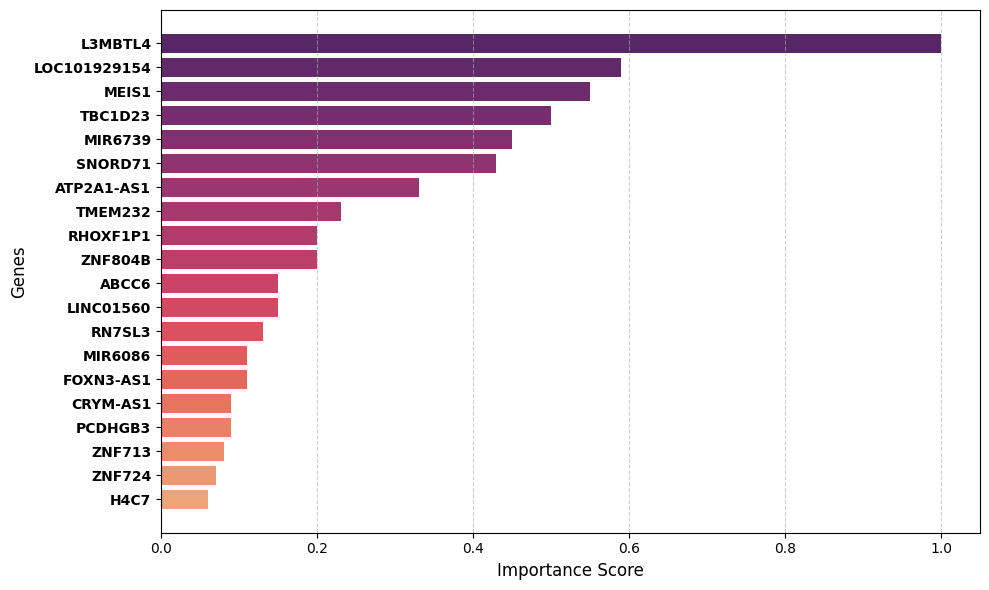

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_20_features is a DataFrame with 'Feature' and 'Score'

# Use flame_r color palette
colors = sns.color_palette("flare_r", n_colors=len(top_20_features))

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Score'], color=colors)

plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Genes', fontsize=12)
# plt.title('Top Twenty Most Important Features (Lasso)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.gca().set_yticklabels(top_20_features['Feature'], fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.2, random_state=42)

lasso_cv = LassoCV(cv=5, random_state=42, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

print(f"🔧 Optimal alpha selected: {lasso_cv.alpha_:.5f}")

lasso_best = LassoCV(alphas=[lasso_cv.alpha_], cv=5).fit(X_scaled, Y_imputed)
coefs = lasso_best.coef_
abs_coefs = np.abs(coefs)

real_gene_names = dff.index.tolist()
real_gene_names = real_gene_names[:len(coefs)]

real_gene_names = real_gene_names[:len(coefs)]

gene_ranks = pd.DataFrame({
    'Gene': real_gene_names,
    'Coefficient': coefs,
    'Importance': abs_coefs
})

top_genes = gene_ranks.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importance'], color='mediumorchid')
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Top 20 Important Genes (LassoCV - Tuned)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
real_gene_names

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS1',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC5-AS1',
 'ABCC6',
 'ABCC6P1',
 'ABCC6P2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD11-AS1',
 'ABH

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict using fitted Lasso model
y_pred_probs = lasso_best.predict(X_test)

# Threshold the continuous outputs at 0.5 to get class predictions
y_pred_labels = (y_pred_probs >= 0.5).astype(int)

# Classification Metrics
print("\n🔍 CLASSIFICATION METRICS:")
print("Accuracy       :", accuracy_score(y_test, y_pred_labels))
print("Precision      :", precision_score(y_test, y_pred_labels))
print("Recall         :", recall_score(y_test, y_pred_labels))
print("F1 Score       :", f1_score(y_test, y_pred_labels))
print("ROC AUC Score  :", roc_auc_score(y_test, y_pred_probs))



🔍 CLASSIFICATION METRICS:
Accuracy       : 1.0
Precision      : 1.0
Recall         : 1.0
F1 Score       : 1.0
ROC AUC Score  : 1.0


<ipython-input-25-54714eb10d67>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_genes['Gene'], fontweight='bold')


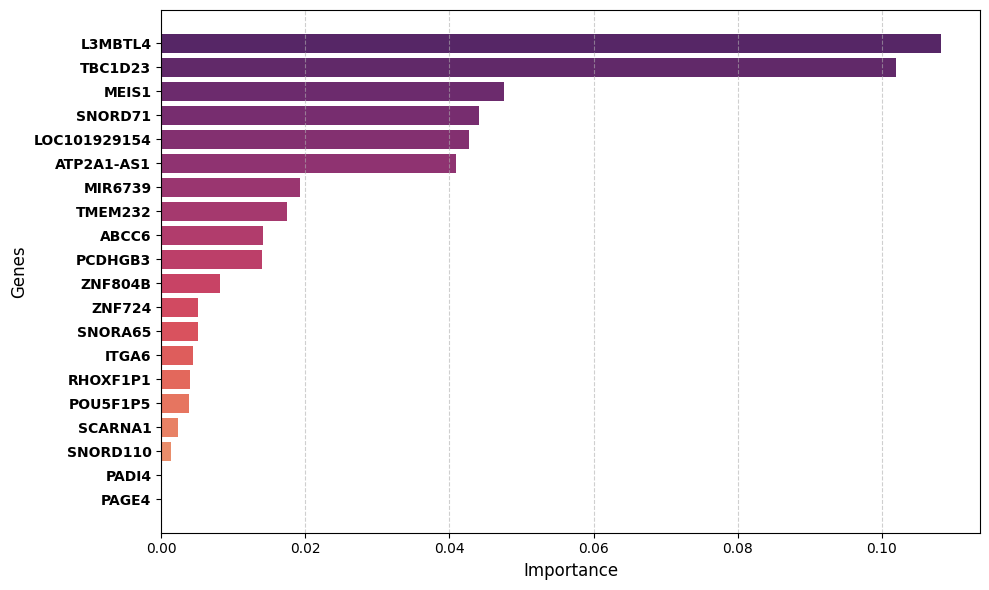

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_genes is a DataFrame with 'Gene' and 'Importance' columns

# Get flame_r colors matching number of genes
colors = sns.color_palette("flare_r", n_colors=len(top_genes))

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importance'], color=colors)

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Genes', fontsize=12)
# plt.title('Top 20 Genes')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.gca().set_yticklabels(top_genes['Gene'], fontweight='bold')

plt.tight_layout()
plt.show()
